In [41]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [43]:
query = '''
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE 'user_%'
      AND status='ready'
      AND labname='project1'
ORDER BY uid
'''
commits = pd.io.sql.read_sql(query, connect, parse_dates=['timestamp'])
commits.sort_values(by='timestamp')

,uid,numTrials,timestamp
777,user_4,1,2020-04-17 05:19:02.744528
778,user_4,2,2020-04-17 05:22:45.549397
779,user_4,3,2020-04-17 05:34:24.422370
780,user_4,4,2020-04-17 05:43:27.773992
781,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
278,user_19,26,2020-05-15 10:22:39.698523
279,user_19,27,2020-05-15 10:22:46.248162
280,user_19,28,2020-05-15 10:23:18.043212
656,user_28,27,2020-05-15 10:38:14.430013


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

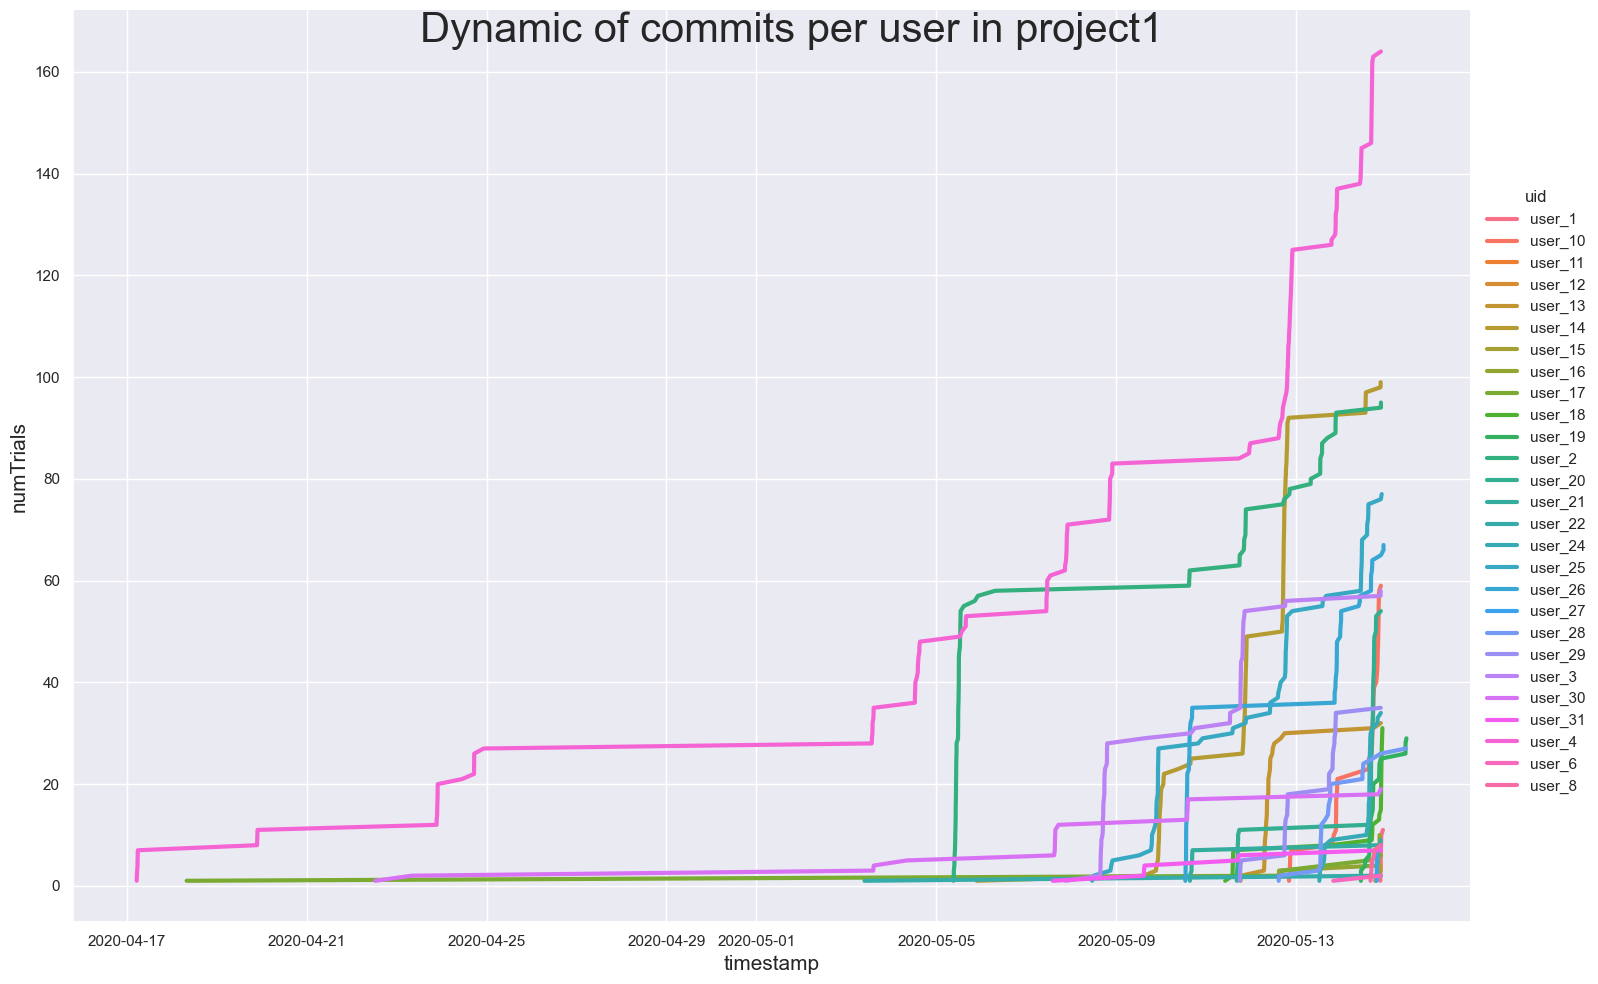

In [44]:
sns.set(palette='dark',
        rc={'axes.labelsize': 15, # размер надписей осей
            'lines.linewidth': 3}) # толщина линий
sns.relplot(data=commits,
            x='timestamp',
            y='numTrials',
            legend='full',
            hue='uid', # линии в легенде
            kind='line',
            height=10,
            aspect=1.5) # ширина графика
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

## Какой пользователь практически все время лидировал по количеству коммитов?

- Ответ: user_4.

#### Какой пользователь был лидером лишь короткий период времени?

- Ответ: user_2.